# 令和二年の簡易生命表から，将来の総人口・年齢構造を推計する
---
## 概要
---
- 厚生労働省は定期的に「生命表」と呼ばれる国民の出生死滅過程を数値化した表を公表している
- 生命表に記載されている死亡確率($_nq_x$)をもとにして，各年代の人口・総人口の推移を予測する．

In [1]:
# 各種パッケージのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 複数のシートがある場合は第二引数で指定できる(p.202)
df = pd.read_excel('lifeR2.xlsx', '令和２年簡易生命表（男）',header=4)

In [3]:
# 空列の除外(p.151)
# もっとスマートな方法はないのか
df = df.drop(df.columns[[0, 2, 4, 6, 8, 10, 12, 14, 15, 17, 19, 21, 23, 25, 27]], axis=1)

In [4]:
df.head(10)

,x,nqx,lx,ndx,nLx,Tx,ex,x.1,nqx.1,lx.1,ndx.1,nLx.1,Tx.1,ex.1
0,0,0.00067,100000,67,1917,8163602,81.64,50.0,0.00245,96936.0,237.0,96820.0,3211009.0,33.12
1,1,0.00005,99933,5,1916,8161685,81.67,51.0,0.00269,96699.0,260.0,96571.0,3114189.0,32.20
2,2,0.00008,99928,8,1916,8159768,81.66,52.0,0.00294,96440.0,283.0,96300.0,3017617.0,31.29
3,3,0.00004,99920,4,1916,8157852,81.64,53.0,0.00322,96156.0,310.0,96004.0,2921317.0,30.38
4,4,0.00020,99916,20,8987,8155936,81.63,54.0,0.00356,95846.0,341.0,95679.0,2825313.0,29.48
5,2,0.00013,99896,13,8324,8146949,81.55,55.0,0.00394,95505.0,376.0,95320.0,2729635.0,28.58
6,3,0.00030,99883,30,24967,8138625,81.48,56.0,0.00435,95129.0,414.0,94925.0,2634315.0,27.69
7,6,0.00036,99852,36,49916,8113658,81.26,57.0,0.00475,94715.0,450.0,94493.0,2539390.0,26.81
8,0,0.00184,100000,184,99860,8163602,81.64,58.0,0.00517,94266.0,487.0,94025.0,2444896.0,25.94
9,1,0.00023,99816,23,99802,8063742,80.79,59.0,0.00565,93778.0,530.0,93517.0,2350871.0,25.07


In [5]:
# 生命表が行方向に折り返されているので、それを戻す(p.157, p.260)

# 列名が揃わないとpd.concatで別に扱われるので、修正
# 一部の列名を変えるだけならrenameでもよい
df2 = df.loc[:,'x.1':]
df2.set_axis(['x', 'nqx', 'lx', 'ndx', 'nLx', 'Tx', 'ex'], axis=1, inplace=True)

In [6]:
# 行方向に一列の生命表DataFrameを作る
life_table_man = pd.concat([df.loc[:,:'ex'], df2])

# 欠損値を含む行を削除
life_table_man = life_table_man.dropna()

# indexを通番で振りなおす(元のインデックスも残るので、
# いらないなら削除したほうが良い)
life_table_man.reset_index(inplace=True, drop=True)

In [7]:
# ちょっと現在のデータを確認
life_table_man.head(10)

,x,nqx,lx,ndx,nLx,Tx,ex
0,0.0,0.00067,100000.0,67.0,1917.0,8163602.0,81.64
1,1.0,0.00005,99933.0,5.0,1916.0,8161685.0,81.67
2,2.0,0.00008,99928.0,8.0,1916.0,8159768.0,81.66
3,3.0,0.00004,99920.0,4.0,1916.0,8157852.0,81.64
4,4.0,0.00020,99916.0,20.0,8987.0,8155936.0,81.63
5,2.0,0.00013,99896.0,13.0,8324.0,8146949.0,81.55
6,3.0,0.00030,99883.0,30.0,24967.0,8138625.0,81.48
7,6.0,0.00036,99852.0,36.0,49916.0,8113658.0,81.26
8,0.0,0.00184,100000.0,184.0,99860.0,8163602.0,81.64
9,1.0,0.00023,99816.0,23.0,99802.0,8063742.0,80.79


In [8]:
life_table_man.tail(10)

,x,nqx,lx,ndx,nLx,Tx,ex
104,96.0,0.24467,8642.0,2114.0,7554.0,24667.0,2.85
105,97.0,0.26791,6527.0,1749.0,5623.0,17114.0,2.62
106,98.0,0.29300,4779.0,1400.0,4050.0,11491.0,2.40
107,99.0,0.31997,3378.0,1081.0,2813.0,7440.0,2.20
108,100.0,0.34884,2297.0,801.0,1875.0,4627.0,2.01
109,101.0,0.37960,1496.0,568.0,1195.0,2752.0,1.84
110,102.0,0.41220,928.0,383.0,723.0,1557.0,1.68
111,103.0,0.44656,546.0,244.0,414.0,834.0,1.53
112,104.0,0.48251,302.0,146.0,222.0,420.0,1.39
113,105.0,1.00000,156.0,156.0,198.0,198.0,1.26


In [9]:
# 年齢は列xに格納されている
# https://www.mhlw.go.jp/toukei/saikin/hw/life/life20/dl/life18-06.pdf
# ↑によると，冒頭の8行は年齢別ではなく，出生直後の数週・数か月のデータである
# 分析を簡便にするために，出生直後の詳細な死亡率のデータは除外する
life_table_man = life_table_man.iloc[8:,:]
life_table_man.head(10)

,x,nqx,lx,ndx,nLx,Tx,ex
8,0.0,0.00184,100000.0,184.0,99860.0,8163602.0,81.64
9,1.0,0.00023,99816.0,23.0,99802.0,8063742.0,80.79
10,2.0,0.00016,99793.0,16.0,99785.0,7963940.0,79.80
11,3.0,0.00011,99777.0,11.0,99771.0,7864155.0,78.82
12,4.0,0.00008,99766.0,8.0,99762.0,7764384.0,77.83
13,5.0,0.00006,99758.0,6.0,99755.0,7664622.0,76.83
14,6.0,0.00006,99751.0,6.0,99749.0,7564868.0,75.84
15,7.0,0.00006,99746.0,6.0,99743.0,7465119.0,74.84
16,8.0,0.00005,99740.0,5.0,99737.0,7365376.0,73.85
17,9.0,0.00005,99735.0,5.0,99732.0,7265639.0,72.85


In [10]:
life_table_man.tail(10)

,x,nqx,lx,ndx,nLx,Tx,ex
104,96.0,0.24467,8642.0,2114.0,7554.0,24667.0,2.85
105,97.0,0.26791,6527.0,1749.0,5623.0,17114.0,2.62
106,98.0,0.29300,4779.0,1400.0,4050.0,11491.0,2.40
107,99.0,0.31997,3378.0,1081.0,2813.0,7440.0,2.20
108,100.0,0.34884,2297.0,801.0,1875.0,4627.0,2.01
109,101.0,0.37960,1496.0,568.0,1195.0,2752.0,1.84
110,102.0,0.41220,928.0,383.0,723.0,1557.0,1.68
111,103.0,0.44656,546.0,244.0,414.0,834.0,1.53
112,104.0,0.48251,302.0,146.0,222.0,420.0,1.39
113,105.0,1.00000,156.0,156.0,198.0,198.0,1.26


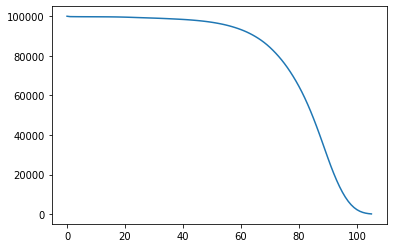

In [11]:
# 年齢を重ねるごとにコーホートがどの程度残存するか試しにプロット

plt.plot(life_table_man.loc[:,'x'], life_table_man.loc[:,'lx'])

## 生命表の各列の説明
---

生命表のデータがDataFrameへ(やっとこさ)成形できたところで，各列がどのような意味を持ったデータであるか説明する．

| 記号 | 名前 | 説明 |
| :---: | :---: | :--- |
| $x$ | 年齢 | 最後の行「105」は105歳以上すべての人口をひとまとまりにしている |
| $_nq_x$ | 死亡確率 | 同年齢の集団のうち，その一年間での死者の割合 |
| $l_x$ | 生存数 | 前年齢の生存数から前年齢の死亡数を引いたもの($l_x-_nd_x$) |
| $_nd_x$ | 死亡数 | 生存数に死亡確率を掛け合わせたもの($l_x * _nq_x$) |
| $_nL_x$ | 定常人口(生存延べ年数) | 同年齢の集団が，その一年間で生存する(経過する)総年数 |
| $T_x$ | 定常人口(生存延べ年数) | 同年齢の集団が，全員死亡するまで生存する(経過する)総年数 |
| $e_x$ | 平均余命 | 定常人口($T_x$)を生存数($l_x$)で割ったもの．一人当たりの残された生存延べ年数を表し，年齢0のときの平均余命を特に「平均寿命」と呼ぶ |

説明から分かるように，生命表のすべての値は死亡確率$_nq_x$から導出される．

もととなる死亡確率は，「簡易生命表」の場合は人口推計による出生数・死亡数をもとに算出している．「完全生命表」の場合は，国勢調査による人口数・死亡数をもとに算出している．

今回使用しているのは「簡易生命表」である．推計値をもとに推計を行うという点で，結果は厳密なものにはなっていない．あらかじめご承知おきください．

In [12]:
# 女性版生命表においても，同様の操作を行いDataFrameへ変換しておく
life_table_women = pd.read_excel('lifeR2.xlsx', '令和２年簡易生命表（女）',header=4)
life_table_women.drop(life_table_women.columns[[0, 2, 4, 6, 8, 10, 12, 14, 15, 17, 19, 21, 23, 25, 27]], axis=1, inplace=True)

tmp_table = life_table_women.loc[:,'x.1':]
tmp_table.set_axis(['x', 'nqx', 'lx', 'ndx', 'nLx', 'Tx', 'ex'], axis=1, inplace=True)


life_table_women = pd.concat([life_table_women.loc[:,:'ex'], tmp_table])

life_table_women.dropna(inplace=True)

life_table_women = life_table_women.iloc[8:,:]

life_table_women.reset_index(inplace=True, drop=True)

life_table_women.head(10)

,x,nqx,lx,ndx,nLx,Tx,ex
0,0.0,0.00172,100000.0,172.0,99868.0,8774406.0,87.74
1,1.0,0.00016,99828.0,16.0,99817.0,8674539.0,86.89
2,2.0,0.00012,99812.0,12.0,99807.0,8574722.0,85.91
3,3.0,0.00009,99800.0,9.0,99796.0,8474915.0,84.92
4,4.0,0.00007,99792.0,7.0,99788.0,8375119.0,83.93
5,5.0,0.00007,99785.0,7.0,99781.0,8275331.0,82.93
6,6.0,0.00007,99778.0,7.0,99775.0,8175549.0,81.94
7,7.0,0.00006,99771.0,6.0,99768.0,8075775.0,80.94
8,8.0,0.00006,99765.0,6.0,99762.0,7976006.0,79.95
9,9.0,0.00005,99759.0,5.0,99756.0,7876244.0,78.95


In [13]:
life_table_women.tail(10)

,x,nqx,lx,ndx,nLx,Tx,ex
96,96.0,0.18745,23642.0,4432.0,21397.0,82179.0,3.48
97,97.0,0.21064,19210.0,4046.0,17151.0,60782.0,3.16
98,98.0,0.23573,15164.0,3574.0,13334.0,43632.0,2.88
99,99.0,0.26276,11589.0,3045.0,10021.0,30297.0,2.61
100,100.0,0.29177,8544.0,2493.0,7251.0,20276.0,2.37
101,101.0,0.32278,6051.0,1953.0,5031.0,13025.0,2.15
102,102.0,0.35576,4098.0,1458.0,3330.0,7994.0,1.95
103,103.0,0.39064,2640.0,1031.0,2092.0,4664.0,1.77
104,104.0,0.42732,1609.0,687.0,1240.0,2572.0,1.6
105,105.0,1.00000,921.0,921.0,1332.0,1332.0,1.45


In [14]:
# 令和元年の年齢階級別出生率を読み込む
birthrate_R1 = pd.read_excel('birthrateR3.xlsx', '表11', header=2)
birthrate_R1

,Unnamed: 0,国名,Unnamed: 2,最新年次,Unnamed: 4,Unnamed: 5,Unnamed: 6,総 数,15～19歳,20～24,25～29,30～34,35～39,40～44,45～49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,日本,NaN,2019.0,令和,元,年,35.7,2.8,24.9,77.2,98.5,55.8,11.7,0.3
2,NaN,韓国,1),2018.0,平成,30,NaN,26.4,1.0,8.1,39.9,89.5,45.9,6.4,0.2
3,NaN,シンガポール,1),2019.0,令和,元,NaN,39.1,2.5,13.4,64.9,108.1,59.6,11.4,0.5
4,NaN,フランス,1),2018.0,平成,30,NaN,51.6,4.6,40.2,107.0,126.9,68.8,18.0,1.2
5,NaN,ドイツ,1),2018.0,NaN,30,NaN,46.2,7.4,35.8,84.3,109.8,63.3,13.5,0.6
6,NaN,イタリア,1),2018.0,NaN,30,NaN,34.8,4.1,25.0,62.0,89.2,59.7,15.7,1.4
7,NaN,スウェーデン,1),2018.0,NaN,30,NaN,53.1,4.3,39.6,104.9,124.9,66.9,14.2,1.0
8,NaN,イギリス,1),2018.0,NaN,30,NaN,49.3,11.8,49.5,89.6,106.5,63.6,14.5,1.0
9,NaN,アメリカ,2),2019.0,令和,元,NaN,58.3,16.7,66.6,93.7,98.3,52.8,12.0,0.9


In [15]:
birthrate_R1.dropna(inplace=True, thresh=2)
birthrate_R1

,Unnamed: 0,国名,Unnamed: 2,最新年次,Unnamed: 4,Unnamed: 5,Unnamed: 6,総 数,15～19歳,20～24,25～29,30～34,35～39,40～44,45～49
1,NaN,日本,NaN,2019.0,令和,元,年,35.7,2.8,24.9,77.2,98.5,55.8,11.7,0.3
2,NaN,韓国,1),2018.0,平成,30,NaN,26.4,1.0,8.1,39.9,89.5,45.9,6.4,0.2
3,NaN,シンガポール,1),2019.0,令和,元,NaN,39.1,2.5,13.4,64.9,108.1,59.6,11.4,0.5
4,NaN,フランス,1),2018.0,平成,30,NaN,51.6,4.6,40.2,107.0,126.9,68.8,18.0,1.2
5,NaN,ドイツ,1),2018.0,NaN,30,NaN,46.2,7.4,35.8,84.3,109.8,63.3,13.5,0.6
6,NaN,イタリア,1),2018.0,NaN,30,NaN,34.8,4.1,25.0,62.0,89.2,59.7,15.7,1.4
7,NaN,スウェーデン,1),2018.0,NaN,30,NaN,53.1,4.3,39.6,104.9,124.9,66.9,14.2,1.0
8,NaN,イギリス,1),2018.0,NaN,30,NaN,49.3,11.8,49.5,89.6,106.5,63.6,14.5,1.0
9,NaN,アメリカ,2),2019.0,令和,元,NaN,58.3,16.7,66.6,93.7,98.3,52.8,12.0,0.9


In [16]:
birthrate_R1.dropna(inplace=True, thresh=2, axis=1)
birthrate_R1

,国名,Unnamed: 2,最新年次,Unnamed: 4,Unnamed: 5,総 数,15～19歳,20～24,25～29,30～34,35～39,40～44,45～49
1,日本,NaN,2019.0,令和,元,35.7,2.8,24.9,77.2,98.5,55.8,11.7,0.3
2,韓国,1),2018.0,平成,30,26.4,1.0,8.1,39.9,89.5,45.9,6.4,0.2
3,シンガポール,1),2019.0,令和,元,39.1,2.5,13.4,64.9,108.1,59.6,11.4,0.5
4,フランス,1),2018.0,平成,30,51.6,4.6,40.2,107.0,126.9,68.8,18.0,1.2
5,ドイツ,1),2018.0,NaN,30,46.2,7.4,35.8,84.3,109.8,63.3,13.5,0.6
6,イタリア,1),2018.0,NaN,30,34.8,4.1,25.0,62.0,89.2,59.7,15.7,1.4
7,スウェーデン,1),2018.0,NaN,30,53.1,4.3,39.6,104.9,124.9,66.9,14.2,1.0
8,イギリス,1),2018.0,NaN,30,49.3,11.8,49.5,89.6,106.5,63.6,14.5,1.0
9,アメリカ,2),2019.0,令和,元,58.3,16.7,66.6,93.7,98.3,52.8,12.0,0.9


In [17]:
# 日本の出生率データをSeriesとして取り出す
birthrate_R1_jp = birthrate_R1.iloc[0,6:]
birthrate_R1_jp

15～19歳     2.8
20～24     24.9
25～29     77.2
30～34     98.5
35～39     55.8
40～44     11.7
45～49      0.3
Name: 1, dtype: object

In [18]:
# 出生率を百分率から確率に修正
birthrate_R1_jp = birthrate_R1_jp / 1000
birthrate_R1_jp

15～19歳    0.0028
20～24     0.0249
25～29     0.0772
30～34     0.0985
35～39     0.0558
40～44     0.0117
45～49     0.0003
Name: 1, dtype: object

生命表から令和二年版死亡率，そして階級別の令和元年版出生率が得られた．人口推計を行うためには，できるだけ現時点に近い人口構成の把握が必要である．令和二年に国勢調査が実施されたので，それを最新の人口構成データとして活用する．

In [19]:
population = pd.read_excel('PopulationR2.xlsx', header=None, skiprows=10,index_col=[0,1,2,3],
                           usecols=[i for i in range(116)],
                           names=[
                              '国籍総数か日本人',
                              '男女',
                              '地域識別コード',
                              '地域名',
                              '総数',] +
                              [str(i)+'歳' for i in range(110)] +
                           ['110歳以上']
                          )
population

総数      0歳      1歳      2歳      3歳  \
国籍総数か日本人 男女   地域識別コード 地域名                                                     
0_国籍総数   0_総数 a       00000_全国    126146099  837131  871558  915067  938911   
                      01000_北海道     5224614   29662   31049   32704   33709   
              1       01100_札幌市     1973395   12221   12616   13160   13467   
              a       02000_青森県     1237984    6720    7059    7595    7890   
                      03000_岩手県     1210534    6579    7090    7484    8030   
...                                     ...     ...     ...     ...     ...   
1_うち日本人  2_女  a       44000_大分県      584000    3607    3712    4004    4041   
                      45000_宮崎県      560714    3740    3875    4023    4245   
                      46000_鹿児島県     832709    5436    5772    6198    6165   
              2       46201_鹿児島市     315422    2115    2152    2376    2288   
              a       47000_沖縄県      736177    7213    7160    7532    7680   

                                      4歳       5歳       6歳       7歳       8歳  \
国籍総数か日本人 男女   地域識別コード 地域名                                                      
0_国籍総数   0_総数 a       00000_全国    978693  1003732  1001512  1025673  1029265   
                      01000_北海道    35487    36539    37269    37866    38634   
              1       01100_札幌市    14131    14404    14601    14522    14815   
              a       02000_青森県     8435     8283     8759     8722     8909   
                      03000_岩手県     8273     8704     8787     9106     9171   
...                                  ...      ...      ...      ...      ...   
1_うち日本人  2_女  a       44000_大分県     4342     4312     4422     4460     4541   
                      45000_宮崎県     4355     4504     4595     4788     4841   
                      46000_鹿児島県    6514     6695     6748     6947     7178   
              2       46201_鹿児島市    2440     2413     2444     2583     2628   
              a       47000_沖縄県     7990     8093     7967     8299     8268   

                                  ...   101歳   102歳  103歳  104歳  105歳  106歳  \
国籍総数か日本人 男女   地域識別コード 地域名         ...                                         
0_国籍総数   0_総数 a       00000_全国    ...  17302  11957  7352  4728  2836  1729   
                      01000_北海道   ...    808    631   358   235   114    72   
              1       01100_札幌市   ...    245    201   107    76    35    21   
              a       02000_青森県   ...    151     93    70    36    24    14   
                      03000_岩手県   ...    213    104    91    48    38    19   
...                               ...    ...    ...   ...   ...   ...   ...   
1_うち日本人  2_女  a       44000_大分県   ...    185    130    83    53    33    20   
                      45000_宮崎県   ...    181    159    86    54    26    17   
                      46000_鹿児島県  ...    317    236   132    75    67    47   
              2       46201_鹿児島市  ...     82     70    33    20    15    10   
              a       47000_沖縄県   ...    227    166   117    76    41    30   

                                  107歳  108歳  109歳  110歳以上  
国籍総数か日本人 男女   地域識別コード 地域名                                   
0_国籍総数   0_総数 a       00000_全国    1058   557   213     141  
                      01000_北海道     49    34    14       6  
              1       01100_札幌市      8    10     5       3  
              a       02000_青森県     13     7     2       -  
                      03000_岩手県      9     4     1       -  
...                                ...   ...   ...     ...  
1_うち日本人  2_女  a       44000_大分県      6     3     2       2  
                      45000_宮崎県     11     3     -       1  
                      46000_鹿児島県    26    13     4       3  
              2       46201_鹿児島市     5     2     1       -  
              a       47000_沖縄県     23     6     1       8  

[594 rows x 112 columns]

In [20]:
# 日本男女の人口データを抜き出す
population.loc[:,'1_男',:,'00000_全国',:]

,,,,総数,0歳,1歳,2歳,3歳,4歳,5歳,6歳,7歳,8歳,...,101歳,102歳,103歳,104歳,105歳,106歳,107歳,108歳,109歳,110歳以上
国籍総数か日本人,男女,地域識別コード,地域名,,,,,,,,,,,,,,,,,,,,,
0_国籍総数,1_男,a,00000_全国,61349581,428005,446054,468457,480153,501907,514130,513861,524747,526616,...,2158,1385,888,483,275,224,128,61,27,1
1_うち日本人,1_男,a,00000_全国,60002838,419610,437350,459892,471578,493300,505856,505460,516684,518696,...,2152,1379,884,478,273,223,127,58,27,1


In [21]:
population.loc[:,'2_女',:,'00000_全国',:]

,,,,総数,0歳,1歳,2歳,3歳,4歳,5歳,6歳,7歳,8歳,...,101歳,102歳,103歳,104歳,105歳,106歳,107歳,108歳,109歳,110歳以上
国籍総数か日本人,男女,地域識別コード,地域名,,,,,,,,,,,,,,,,,,,,,
0_国籍総数,2_女,a,00000_全国,64796518,409126,425504,446610,458758,476786,489602,487651,500926,502649,...,15144,10572,6464,4245,2561,1505,930,496,186,140
1_うち日本人,2_女,a,00000_全国,63396124,401157,417341,438709,450781,468534,481796,479711,493469,495395,...,15117,10548,6451,4236,2559,1502,930,494,184,140


## 人口推計
---
やっとこさ必要なデータが揃ったので，令和二年(2020)から向こう100年先(2120)までの総人口を推定する．

人口の計算方法は「コーホート要因法」を簡易化したものとする．具体的には，出生率と死亡率はそれぞれ抽出した令和元年(2019)，令和二年(2020)の値から変化がないものとする．そして，1年経過するごとに年齢階級を1つずつずらし，空いた0歳階級には出産活動に従事できる年齢とされている15から49歳までの女性人口に出生率を乗算したものを与える．つまり，年を経るごとにベルトコンベアのようにして各階級の人口が移動するような形になる．

総人口は，各年の各階級の人口の総和として求められる．さっそくやっていこう．

In [22]:
# 100年先までの総人口を推定する
years = 100
population_jpn_estimated = []

# 2020年の総人口は先に加えておく
population_jpn_estimated.append(population.loc['0_国籍総数','0_総数','a','00000_全国',:]['総数'].values[0])
population_jpn_estimated

[126146099]

In [23]:
# 女性人口
population_jpn_women = population.loc['0_国籍総数','2_女','a','00000_全国']['0歳':]
population_jpn_women

0歳        409126
1歳        425504
2歳        446610
3歳        458758
4歳        476786
           ...  
106歳        1505
107歳         930
108歳         496
109歳         186
110歳以上       140
Name: (0_国籍総数, 2_女, a, 00000_全国), Length: 111, dtype: object

In [24]:
# 男性人口
population_jpn_men = population.loc['0_国籍総数','1_男','a','00000_全国']['0歳':]
population_jpn_men

0歳        428005
1歳        446054
2歳        468457
3歳        480153
4歳        501907
           ...  
106歳         224
107歳         128
108歳          61
109歳          27
110歳以上         1
Name: (0_国籍総数, 1_男, a, 00000_全国), Length: 111, dtype: object

In [25]:
# 出生率
birthrate_R1_jp

15～19歳    0.0028
20～24     0.0249
25～29     0.0772
30～34     0.0985
35～39     0.0558
40～44     0.0117
45～49     0.0003
Name: 1, dtype: object

In [26]:
# 各階級ごとに出生率が等しいとして，各歳の出生率の形式に成形
birthrate_R1_jp_years = pd.concat([birthrate_R1_jp for _ in range(5)])
birthrate_R1_jp_years.sort_index(inplace=True)
birthrate_R1_jp_years.index = [str(i)+'歳' for i in range(15,50)]
birthrate_R1_jp_years

15歳    0.0028
16歳    0.0028
17歳    0.0028
18歳    0.0028
19歳    0.0028
20歳    0.0249
21歳    0.0249
22歳    0.0249
23歳    0.0249
24歳    0.0249
25歳    0.0772
26歳    0.0772
27歳    0.0772
28歳    0.0772
29歳    0.0772
30歳    0.0985
31歳    0.0985
32歳    0.0985
33歳    0.0985
34歳    0.0985
35歳    0.0558
36歳    0.0558
37歳    0.0558
38歳    0.0558
39歳    0.0558
40歳    0.0117
41歳    0.0117
42歳    0.0117
43歳    0.0117
44歳    0.0117
45歳    0.0003
46歳    0.0003
47歳    0.0003
48歳    0.0003
49歳    0.0003
Name: 1, dtype: object

In [27]:
# 人口推計
for i in range(years):
    # 総出生数を計算
    babies = int(population_jpn_women['15歳':'49歳'].dot(birthrate_R1_jp_years))
    
    # 男児と女児に分ける(出生性比は1.05とする)
    babies_women = int(babies / 2.05)
    babies_men = babies - babies_women
    
    # 全人口に1歳ずつ年を取ってもらい，0歳階級に新生児を加える
    population_jpn_women = population_jpn_women.shift(1)
    population_jpn_women['0歳'] = babies_women
    
    population_jpn_men = population_jpn_men.shift(1)
    population_jpn_men['0歳'] = babies_men
    
    # 総人口の計算
    population_jpn_estimated.append(population_jpn_men.sum()+population_jpn_women.sum())

<AxesSubplot:title={'center':'Population Estimation(JPN)'}, xlabel='year', ylabel='population'>

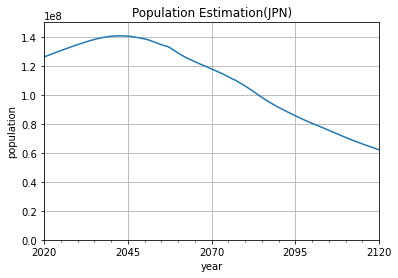

In [28]:
# 推定した人口をSeriesに成形してプロット
population_jpn_estimated = pd.Series(population_jpn_estimated,
                                     index=pd.period_range(start='2020', end='2120', freq='Y'))

population_jpn_estimated.plot(title='Population Estimation(JPN)',
                             grid=True,
                             ylim=[0, 150000000],
                             xlabel='year',
                             ylabel='population',
                             )

内閣府の報告によると，
> 我が国の総人口は、今後、長期の人口減少過程に入り、平成38（2026）年に人口1億2,000万人を下回った後も減少を続け、60（2048）年には1億人を割って9,913万人となり、72（2060）年には8,674万人になると推計されている

という記載があった．

本notebookの簡易的な試算では人口1億2000万人を割り込むのは2065年以降になっているし，1億人を割り込むのは2085年あたりである．したがって，説明変数を増やしてより多くの要素を加味すると，予想以上の速さで人口減少が進むと考えられる．

## 参考文献
---
河野稠果，人口学への招待，中公新書，2007．

[令和２年簡易生命表の概況，厚生労働省](https://www.mhlw.go.jp/toukei/saikin/hw/life/life20/index.html)

[pandas.DataFrame.reset_index，pandas 1.3.5 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

[令和３年度 出生に関する統計の概況，厚生労働省](https://www.mhlw.go.jp/toukei/saikin/hw/jinkou/tokusyu/syussyo07/index.html)

[国勢調査 令和２年国勢調査 参考表：不詳補完結果 令和２年国勢調査に関する不詳補完結果，e-Stat](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200521&tstat=000001136464&cycle=0&year=20200&month=24101210&tclass1=000001154387&tclass2=000001159626&tclass3val=0)

[pandas.read_excel，pandas 1.3.5 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

[pandas.concat，pandas 1.4.0 documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

[pandas.DataFrame.sort_index，pandas 1.4.0 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html)

[pandas.Series.shift，pandas 1.4.0 documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html)

[pandas.Series.plot，pandas 1.4.0 documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)

[将来推計人口でみる50年後の日本，内閣府](https://www8.cao.go.jp/kourei/whitepaper/w-2013/zenbun/s1_1_1_02.html#:~:text=%E6%88%91%E3%81%8C%E5%9B%BD%E3%81%AE%E7%B7%8F%E4%BA%BA%E5%8F%A3%E3%81%AF,1%EF%BC%8D1%EF%BC%8D3%EF%BC%89%E3%80%82)